# Multiple Linear Regression

So far we were just looking on simple linear regression problems. But within a linear regression model there could also be used more than one independent variable to describe the dependent varialbe. 

## Learning Objectives

At the end of this notebook you should be able to
- Apply multiple linear regression in python
- Interprete multiple linear regression models
- Explain why it is better to use **adjusted $R^2$** than $R^2$ to compare multiple linear regression models

## The Multiple Regression Model

Multiple linear regression is very similar to simple linear regression except that the dependent variable $y$ is described by $k$ independent variables $x_1, \dots, x_k$  

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k + \varepsilon $$  

**Our predicted model**  

$$\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_k x_k$$

* The interpretation of the intercept is the same  
* Slope $b_i$ is the change in $y$ given a unit change in $x_i$ while **holding all other variables constant**  




In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [4]:
#using the same car dataset as before
cars = pd.read_csv("data/cars_multivariate.csv",
                  na_values='?')
cars.head(n=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


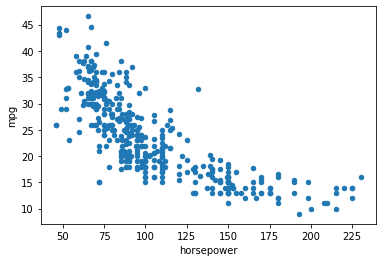

In [5]:
cars.plot('horsepower', 'mpg', kind='scatter');

## Define model

As before, we will first use a simple linear regression model and see how well it fits our data.

In [7]:
import statsmodels.api as sm

In [8]:
X = cars.horsepower
X = sm.add_constant(X)
y = cars.mpg

sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        18:47:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This same model can be fitted using **another syntax** to define model:


In [11]:
# "formula notation" (similar to R)
import statsmodels.formula.api as smf
# Define the model, fit the model, and generate the summary
smf.ols(formula='mpg ~ horsepower', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        18:51:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Did you notice, hat with this syntax we didn't need to add a "constant" to calculate the intercept? 

## Multiple Regression  

Instead of using `horsepower` as the only independent variable to predict `mpg`, we might want to include other independent variables in the model.  

Let's try to add `weight` to the model.

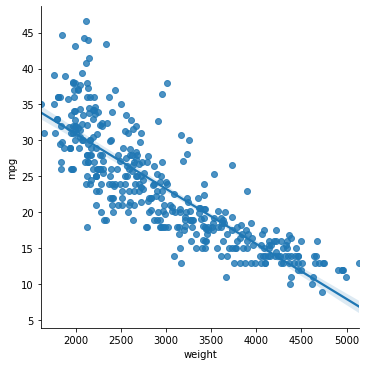

In [12]:
sns.lmplot('weight', 'mpg',data=cars);

In [13]:
X2 = cars[['horsepower', 'weight']]
X2 = sm.add_constant(X2)
y2 = cars.mpg

X2.head(n=2)

,const,horsepower,weight
0,1.0,130.0,3504.0
1,1.0,165.0,3693.0


In [14]:
sm.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          3.06e-104
Time:                        18:51:43   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Does this Model describe the variance of `mpg` better than the simple linear regression?

Our model explains about 70% of the variation in `mpg`.

Our multiple regression model is give by  

$$ \hat{mpg} = 45.6402 - 0.0473 \times horsepower - 0.0058 \times weight $$

What is the predicted `mpg` for a car with 200 `horsepower` and a `weight` of 3500?

$$ \hat{mpg} = 45.6402 - 0.0473 (200) - 0.0058 (3500) = 15.88 $$  


We would expected the `mpg` of the car to be 15.88.
This can of course also be calculated with our model. We only need to call the `.predict()`function and name the values of X.

In [16]:
test_car = [1,200,3500]
sm.OLS(y2, X2).fit().predict(test_car)

array([15.90008745])

## Model Interpretation

**Intercept** 

The mean value for $y$ when all $x=0$


**slope**:

For each unit increase in $x$, the expected increase/decrease in $y$ 

In the case of multiple linear regression, we need to add "holding all other explanatory variables constant", since there are more than one exaplanatory variable in the model.



In [11]:
# The coefficients
sm.OLS(y2, X2).fit().params

const         45.640211
horsepower    -0.047303
weight        -0.005794
dtype: float64

We would expect `mpg` to decrease by 0.047 as `horsepower` goes up by 1,  **holding `weight` constant**.

We would expect `mpg` to decrease by 0.006 as `weight` increases by 1, **holding `horsepower` constant**, 

We can also use the other model syntax we have seen before with multiple linear regression:

In [17]:
# mpg explained by horsepower and weight
smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          3.06e-104
Time:                        19:05:51   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Explore Multiple Regression
-------

A really graphical way of explaining Ordinary Least Squeares can be found here:
[OLS Explained Visually](http://setosa.io/ev/ordinary-least-squares-regression/)

Unfortunately, multiple linear regression is not so easy to display, but the use of only two independent variables predicting a dependent variable can still be displayed graphically with a 3D plot.

Now we will try to plot the data points and our adjusted linear model on the three axes (horsepower, weight and mpg). With two variables instead of one independent variable, our model is not represented by a line, but by a 2D plane.

How to built this 3D-plot is explained in this link: [Datarobot Multiple Regression Appendix, how to create a three dimensional hyperplane plot](https://www.datarobot.com/blog/multiple-regression-using-statsmodels/#appendix).

Please try to implement the code for the 3D-plot on our Car data set and our multiple linear regression model using `horsepower` and `weight` as independent variables and `mpg` as dependent variable (`X2`,`y2`).

If you type in 
```Python:
%matplotlib notebook
```
you will get a interactive 3D-plot, where you can change your view on the data.

In the cells below, the documentation is already complete (including the resource, which is good practice when using code Snipplets from others). You can just implement to code for 3-Plot from this resource acordingly to our data.

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# reference: https://www.datarobot.com/blog/multiple-regression-using-statsmodels/#appendix


# %matplotlib notebook
## fit a OLS model with intercept on horsepower and weight


## Create the 3d plot 
# horsepower/weight grid for 3d plot

# plot the hyperplane (HP) by evaluating the parameters on the grid

# create matplotlib 3d axes

# plot hyperplane

# plot data points - points over the HP are white, points below are black

# set axis labels

fig.show();

NameError: name 'fig' is not defined

**Example**  

Now let's try to predict `mpg` using `displacement`, `horsepower`, `weight` and `acceleration`. 

In [21]:
cars[['displacement', 'horsepower', 'weight', 'acceleration']].corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


You see that there are quite some correlations between these variables! These correlations can also be seen in the scatter plots:

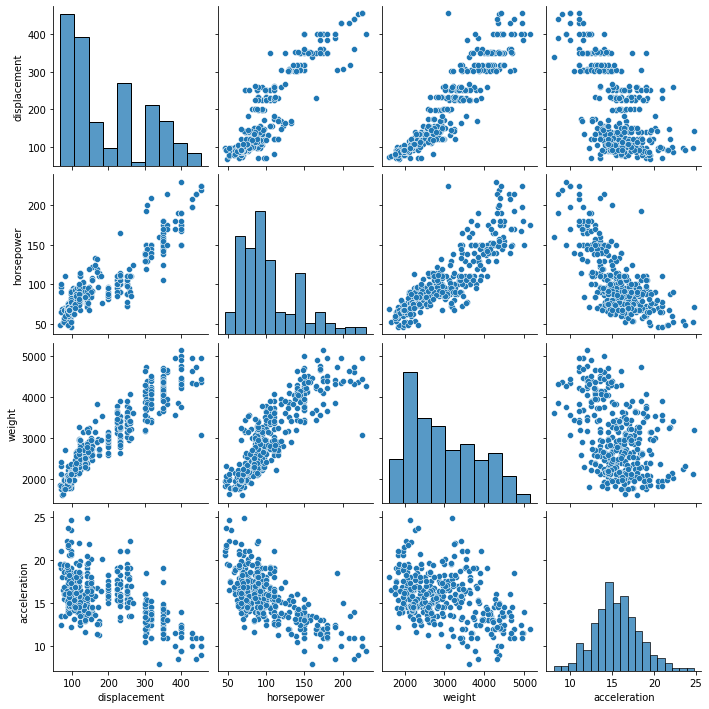

In [19]:
X3 = cars[['displacement', 'horsepower', 'weight', 'acceleration']]
sns.pairplot(X3);


In [23]:
X3 = sm.add_constant(X3)
y3 = cars.mpg

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          9.63e-102
Time:                        19:11:48   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You should always wuestion your model. Here are some questions you should be able to anser:

How good is the model fit?

What is our regression equation?



<br>

<details><summary>
Click here for the solution
</summary>
(copy the lines below to a markdown cell)
$$ \hat{mpg} = 45.2511 - 0.0060 \times displacement - 0.0436 \times horsepower - 0.0053 \times weight - 0.0231 \times acceleration $$
</details>


How do we interpret the model?

Is it a good idea to include `displacement` in the model?

## $R^2$  


 $R^2$ leads to an overwhelming temptation to put lots of $X$’s in.  

This is a not great idea 💡. We want to summarize and predict - __and__ we want to do it in the simplest possible way. 

In [24]:
rs = smf.ols(formula='mpg ~ horsepower', data=cars).fit().rsquared
f'{rs:.3}'

'0.606'

In [25]:
rs = smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().rsquared
f'{rs:.3}'

'0.706'

In [26]:
rs = smf.ols(formula='mpg ~ displacement + horsepower + weight + acceleration', data=cars).fit().rsquared
f'{rs:.3}'

'0.707'

## Adjusted $R^2$  

The adjusted $R^2$ is designed to build in an automatic penalty for adding an $X$.  

$$R_a^2 = 1 - \frac{\frac{1}{n - k - 1} SSE}{\frac{1}{n - 1} SST} $$  

We use adjusted $R^2$ when we compare models with different numbers of independent variables.

$R^2$ penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

According to the adjusted $R^2$, which is the best model we have fitted so far? Calculate adjusted $R^2$ for the former three models!

Summary
-----

- We extend the linear regression model to include many explanatory variables (Xs).
- All explanatory variables should be independent of each other.
- $R^2$ allows use to measure how good a model fits the data.
- Adjusted $R^2$ penalizes adding non-useful explanatory variables. And is used to compare models with different numbers of independent variables.

----
Bonus Material
----

### The Overall F Test  

Instead of testing if one independent variable is useful for predicting the dependent variable, we might want to test if the model as a whole is useful for predicting the dependent variable.  

For that, we use the F test.  

* It tests the null hypothesis:  

$$ H_0: \beta_1 = \beta_2 = \dots = \beta_k = 0$$  

* Under the null hypothesis, there are no $X$ variables in the model.  

* The alternative hypothesis:  

$$ H_a: \text{ at least one } \beta_i \neq 0 $$  

**Test statistic**  

$$f = \frac{\frac{SSR}{k}}{\frac{SSE}{(n - k - 1)}}$$ 

The larger the value of $f$, the stronger the evidence to reject the null.  

The test statistic follows an F distribution, and we find the p-value by comparing the test statistic to an F distribution with degress of freedom $k$ and $n - k - 1$.   

We will simply read the p-value from the regression output. (Score!)

In [ ]:

results3.summary()

$$\text{F-statistic} = 233.4$$
$$\text{p-value} = 9.63 \times 10^{-102} $$   

We have extremely strong evidence to conclude that the at least one of the variables in the model is useful for predicting `mpg`.

Is Model 1 (with one variable `horsepower`) useful for predicting `mpg`?

In [ ]:
# Add the model here and answer the questions by looking at the Regression Results
results.summary()

Is Model 2 (with two variables `horsepower` and `weight`) useful for predicting `mpg`?

In [ ]:
# Add the model here and answer the questions by looking at the Regression Results
results2.summary()

In [ ]:
X4 = cars[['displacement', 'horsepower', 'acceleration']]

X4 = sm.add_constant(X4)
y3 = cars.mpg

model4 = sm.OLS(y3, X4)
results4 = model4.fit()
results4.summary()